In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import stylia as st
from stylia import ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH

predspath = "../results/zairachem/tdcomms_alldescs/preds"
resultspath = "../results/zairachem/tdcomms_alldescs"
modelspath =  "../results/zairachem/tdcomms_alldescs/models"

In [2]:
benchmarks = {
    "hia-hou":[0.989,"rocauc"],
    "pgp-broccatelli":[0.954,"rocauc"],
    "bbb-martins":[0.933,"rocauc"],
    "cyp2c9-veith":[0.895,"rocauc"],
    "cyp2d6-veith":[0.801,"prauc"],
    "cyp3a4-veith":[0.919,"prauc"],
    "cyp2c9-substrate-carbonmangels":[0.478, "prauc"],
    "cyp2d6-substrate-carbonmangels":[0.724,"prauc"],
    "cyp3a4-substrate-carbonmangels":[0.696,"rocauc"],
    "herg":[0.891,"rocauc"],
    "ames":[0.868,"rocauc"],
    "dili":[0.933, "rocauc"],
}

descriptors = [
        "eos5axz",
        "eos4u6p",
        "eos2gw4",
        "eos9o72",
        "eos4ex3",
        "eos4rw4",
        "eos4ywv",
        "eos3l5f",
        "eos82v1",
        "eos8a4x", 
        "eos8aa5"
    ]

In [12]:
all_perfs = {}
assays = []
for d in descriptors:
    performances = {}
    for k,v in benchmarks.items():
        assays += [k]
        perf = pd.read_csv(os.path.join(predspath, k, "performance_table.csv"))
        performances[k] = perf.loc[perf["model"]==f"lq_estimators-{d}"]["auroc"].tolist()[0]
    all_perfs[d] = performances
df_perfs = pd.DataFrame(all_perfs)

aurocs = []
auprcs = []
for k,v in benchmarks.items():
    perf = pd.read_csv(os.path.join(predspath, k, "performance_table.csv"))
    aurocs += [perf.loc[perf["model"]=="pooled"]["auroc"].tolist()[0]]
    auprcs += [perf.loc[perf["model"]=="pooled"]["aupr"].tolist()[0]]
df_perfs["auroc_pooled"] = aurocs
df_perfs["auprc_pooled"] = auprcs
df_perfs_ = df_perfs.reset_index().rename(columns={"index":"benchmark"})
df_perfs_.to_csv(os.path.join(resultspath, "all_descriptor_performances.csv"), index=False)

In [13]:
df_perfs

,eos5axz,eos4u6p,eos2gw4,eos9o72,eos4ex3,eos4rw4,eos4ywv,eos3l5f,eos82v1,eos8a4x,eos8aa5,auroc_pooled,auprc_pooled
hia-hou,0.983539,0.988889,0.927572,0.983951,0.977778,0.987243,0.925926,0.970370,0.989712,0.979424,0.982716,0.995062,0.998562
pgp-broccatelli,0.908824,0.939083,0.912223,0.909291,0.913223,0.935217,0.877433,0.928152,0.911890,0.899427,0.926220,0.943148,0.948069
bbb-martins,0.868007,0.943479,0.890516,0.932886,0.924197,0.922873,0.876821,0.906943,0.933921,0.931728,0.932224,0.942693,0.986095
cyp2c9-veith,0.868177,0.888226,0.856030,0.887972,0.868261,0.875753,0.810794,0.914801,0.868452,0.860639,0.884872,0.900977,0.789261
cyp2d6-veith,0.852400,0.893850,0.841595,0.874028,0.861609,0.875471,0.805193,0.891369,0.852802,0.852321,0.888507,0.902779,0.730841
cyp3a4-veith,0.863856,0.883662,0.841761,0.881921,0.852781,0.867207,0.806821,0.895831,0.858645,0.849509,0.892485,0.900557,0.874691
cyp2c9-substrate-carbonmangels,0.650570,0.686381,0.602821,0.620184,0.614759,0.645551,0.579490,0.710255,0.632393,0.632664,0.670374,0.662778,0.436678
cyp2d6-substrate-carbonmangels,0.823665,0.830054,0.810631,0.804498,0.808587,0.806798,0.776131,0.814209,0.820854,0.821876,0.858165,0.843598,0.731711
cyp3a4-substrate-carbonmangels,0.618475,0.680288,0.628777,0.633700,0.630609,0.656364,0.673191,0.646062,0.600847,0.639538,0.623397,0.655678,0.692929
herg,0.831868,0.844889,0.798665,0.843099,0.839355,0.847493,0.775228,0.889648,0.841960,0.870931,0.879557,0.875651,0.950869


In [14]:
rows = []

for k,v in benchmarks.items():
    score = (
        df_perfs.loc[k, "auroc_pooled"]
    )

    rows.append({
        "task": k,
        "metric": v[1],
        "benchmark": v[0],
        "pooled": score
    })

cmp_df = pd.DataFrame(rows)

In [16]:
df_best = df_perfs[descriptors].idxmax(axis=1)
df_best = pd.DataFrame({"benchmark": df_best.index, "best_descriptor": df_best.values})
auroc_best_desc = [
    df_perfs.loc[bench, desc]
    for bench, desc in zip(df_best["benchmark"], df_best["best_descriptor"])
]
auroc_pooled = [
    df_perfs.loc[bench, "auroc_pooled"]
    for bench in df_best["benchmark"]
]
df_best["auroc_descriptor"]=auroc_best_desc
df_best["pooled"] = auroc_pooled
df_best["difference"] = df_best["auroc_descriptor"] - df_best["pooled"]

In [17]:
df_best

,benchmark,best_descriptor,auroc_descriptor,pooled,difference
0,hia-hou,eos82v1,0.989712,0.995062,-0.005350
1,pgp-broccatelli,eos4u6p,0.939083,0.943148,-0.004066
2,bbb-martins,eos4u6p,0.943479,0.942693,0.000786
3,cyp2c9-veith,eos3l5f,0.914801,0.900977,0.013823
4,cyp2d6-veith,eos4u6p,0.893850,0.902779,-0.008929
5,cyp3a4-veith,eos3l5f,0.895831,0.900557,-0.004727
6,cyp2c9-substrate-carbonmangels,eos3l5f,0.710255,0.662778,0.047477
7,cyp2d6-substrate-carbonmangels,eos8aa5,0.858165,0.843598,0.014567
8,cyp3a4-substrate-carbonmangels,eos4u6p,0.680288,0.655678,0.024611
9,herg,eos3l5f,0.889648,0.875651,0.013997


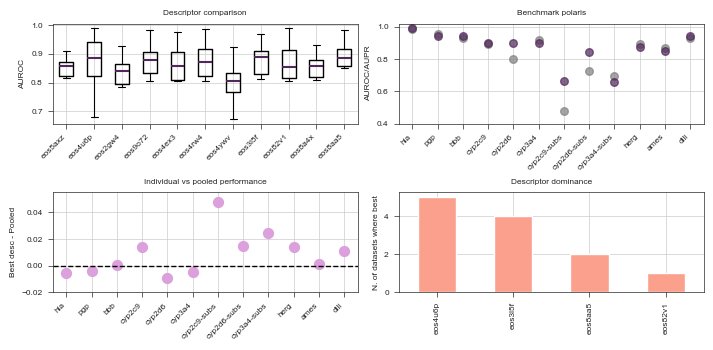

In [18]:
fig, axs = st.create_figure(2,2)

rename_dfs = {
    "hia-hou":"hia",
    "pgp-broccatelli":"pgp",
    "bbb-martins":"bbb",
    "cyp2c9-veith":"cyp2c9",
    "cyp2d6-veith":"cyp2d6",
    "cyp3a4-veith":"cyp3a4",
    "cyp2c9-substrate-carbonmangels": "cyp2c9-subs",
    "cyp2d6-substrate-carbonmangels":"cyp2d6-subs",
    "cyp3a4-substrate-carbonmangels":"cyp3a4-subs",
    "herg":"herg",
    "ames":"ames",
    "dili":"dili",
}

ax = axs.next()
ax.boxplot([df_perfs[d].values for d in descriptors], 
            showfliers=False,
            medianprops=dict(color="#50285a", linewidth=1.5),
            whiskerprops=dict(linewidth=0.8),capprops=dict(linewidth=0.8))
ax.set_xticklabels(descriptors, rotation=45, ha="right")
st.label(ax,
         title="Descriptor comparison",
         xlabel="",
         ylabel="AUROC")

ax = axs.next()
for i,b in enumerate(benchmarks.keys()):
    ax.scatter(i,cmp_df[cmp_df["task"]==b]["benchmark"], color="gray", alpha=0.7, s=30)
    ax.scatter(i,cmp_df[cmp_df["task"]==b]["pooled"], color = "#50285a", alpha=0.7, s=30)
ax.set_xticks(range(len(benchmarks)))
ax.set_xticklabels(rename_dfs.values(), rotation=45, ha="right")
ax.set_ylim(0.4,1.02)
st.label(ax,
         title="Benchmark polaris",
         xlabel="",
         ylabel="AUROC/AUPR")


ax = axs.next()
ax.axhline(0, color="black", linestyle="--", linewidth=1)

ax.scatter(
    df_best["benchmark"],
    df_best["difference"],
    s=50,
    color="#dca0dc"
)
ax.set_xticks(range(len(benchmarks)))
ax.set_xticklabels(rename_dfs.values(), rotation=45, ha="right")
ax.set_ylim(-0.02,0.055)
st.label(ax,
         title="Individual vs pooled performance",
         xlabel="",
         ylabel="Best desc - Pooled")

ax = axs.next()
best_counts = df_perfs[descriptors].idxmax(axis=1).value_counts()
best_counts.plot(kind="bar", color = "#faa08c")
st.label(ax,
         title="Descriptor dominance",
         xlabel="",
         ylabel="N. of datasets where best")

plt.tight_layout()

st.save_figure(os.path.join(resultspath,"descriptor_performance.png"))